In [48]:
import cv2
import os
import glob
from matplotlib import pyplot as plt

In [49]:
def DisplayImageComparison(original, augmented, augmentedTitle = "Augmented"):
    """This function shows a comparason of orginal vs augmented image"""
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(augmented)
    ax[1].set_title(augmentedTitle)
    plt.tight_layout()
    plt.show()

def DisplayImage(image):
    plt.imshow(image)
    plt.title("Image")
    plt.show()

def ReadImageRGB(pathToImage):
    return cv2.cvtColor(cv2.imread(pathToImage), cv2.COLOR_BGR2RGB)

def ScaleImageToSize(image, newWidth, newHeight, interpolationMethod = cv2.INTER_LINEAR):
    # Scale the image to a given size
    # image - input image as a matrix
    # newWidth - new Width for the imamge (x axis) 
    # newHeight - new height for the image (y axis)
    # interpolationMethod - interpolation method used
    
    return cv2.resize(image,(newWidth, newHeight), interpolation = interpolationMethod)

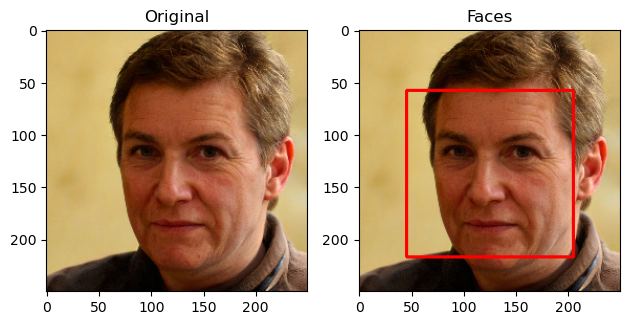

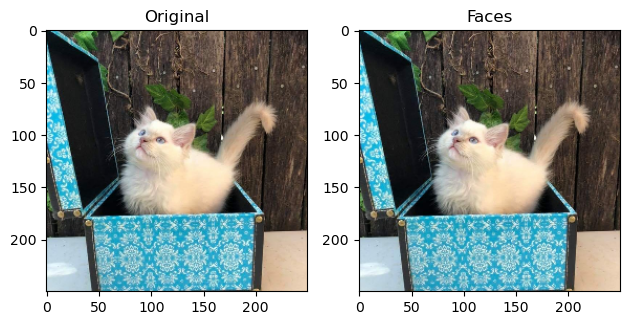

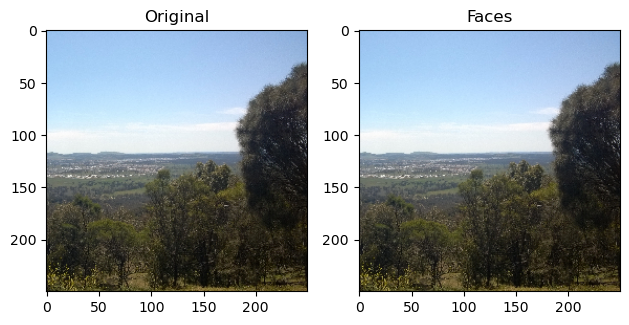

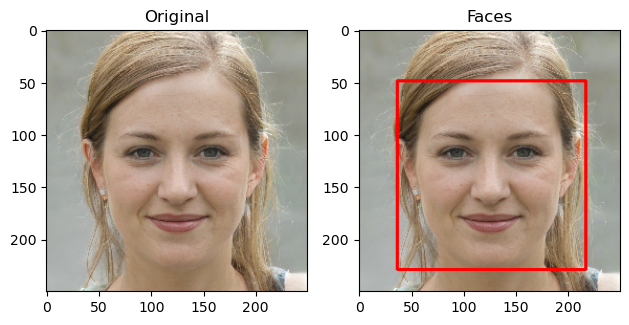

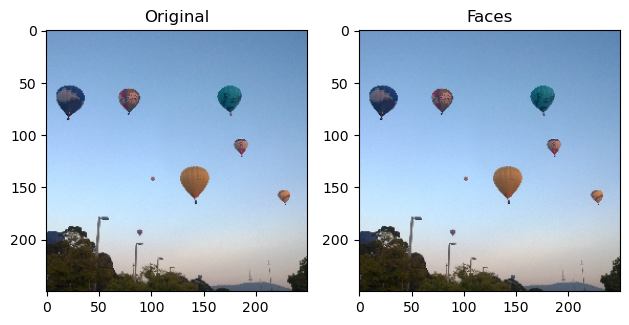

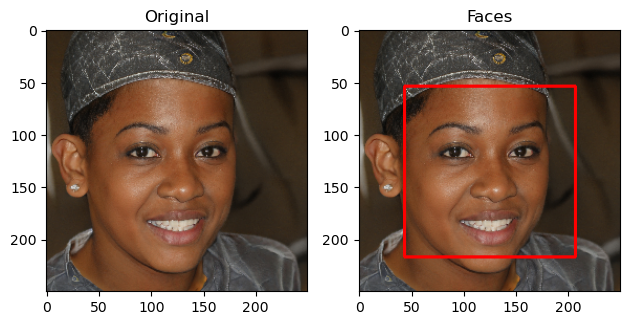

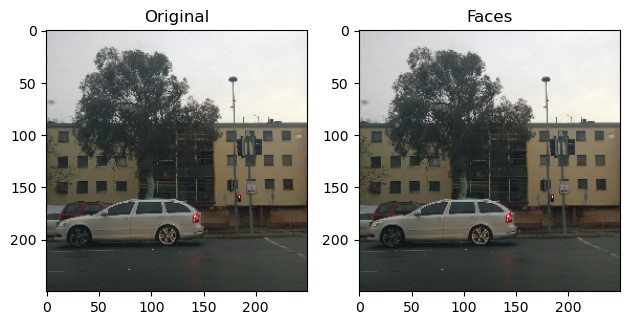

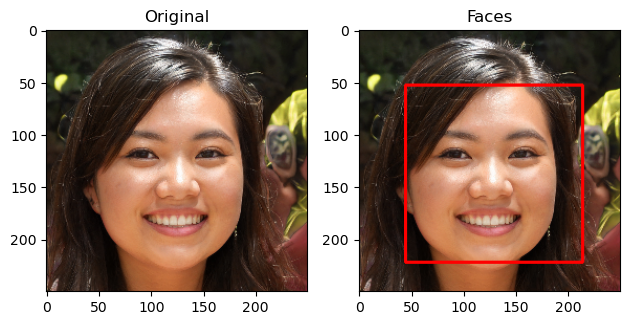

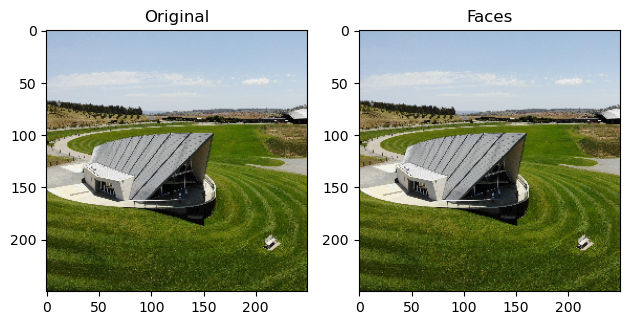

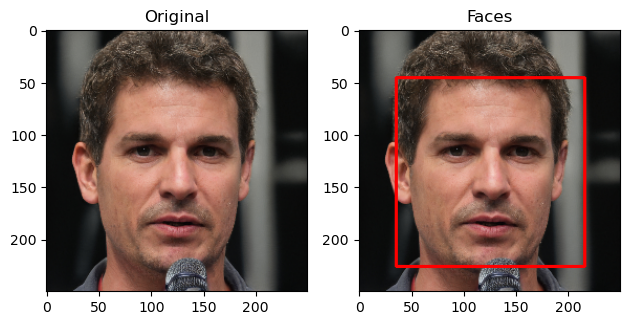

In [51]:
#list images
basePath = 'C:\\Users\\theza\\Documents\\GitHub\\Python-Code-Snippets\\Tutes\\OpenCV\\Face\\ExampleImgs'
imgPaths = glob.glob(os.path.join(basePath, "*"))

# Load the cascade model
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

for im in imgPaths:    
    # read and resize the image (resizing is done to improve preformance)
    img = ScaleImageToSize(ReadImageRGB(im),250,250)
    imgCpy = ScaleImageToSize(ReadImageRGB(im),250,250)
    
    #Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Detect faces
    # minNeighbors controls the sensitivity of the model, a lower number may result in more false positives. hoever a higher number will result in more processing time
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=8)    
    # Draw boxes around any faces that were found
    for (x, y, w, h) in faces:
        cv2.rectangle(imgCpy, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    DisplayImageComparison(img, imgCpy, "Faces")